<a href="https://colab.research.google.com/github/yomix1234/DATASCIENCE--PROJECTS/blob/main/WORLDDATA2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
pip install geopandas

In [9]:
# Python's Version
from platform import python_version
print(f"Python's version for this project: {python_version()}")

Python's version for this project: 3.10.12



**LIBRARIES**

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

**MOUNT DRIVE**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
#Load the dataset into a data frame using Python

data = pd.read_csv('/world-data-2023.csv')
data

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32,VE,24.50%,"912,050","343,000",17.88,58.0,Caracas,"164,175",...,45.80%,1.92,"28,515,829",59.70%,NaN,73.30%,8.80%,"25,162,368",6.423750,-66.589730
191,Vietnam,314,VN,39.30%,"331,210","522,000",16.75,84.0,Hanoi,"192,668",...,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
192,Yemen,56,YE,44.60%,"527,968","40,000",30.45,967.0,Sanaa,"10,609",...,81.00%,0.31,"29,161,922",38.00%,NaN,26.60%,12.91%,"10,869,523",15.552727,48.516388
193,Zambia,25,ZM,32.10%,"752,618","16,000",36.19,260.0,Lusaka,"5,141",...,27.50%,1.19,"17,861,030",74.60%,16.20%,15.60%,11.43%,"7,871,713",-13.133897,27.849332


**DATA UNDERSTANDING**

In [14]:
print("******************Columns******************")
for idx, col in enumerate(data.columns, start=1):
    print(f"{idx}: {col}")

******************Columns******************
1: Country
2: Density
(P/Km2)
3: Abbreviation
4: Agricultural Land( %)
5: Land Area(Km2)
6: Armed Forces size
7: Birth Rate
8: Calling Code
9: Capital/Major City
10: Co2-Emissions
11: CPI
12: CPI Change (%)
13: Currency-Code
14: Fertility Rate
15: Forested Area (%)
16: Gasoline Price
17: GDP
18: Gross primary education enrollment (%)
19: Gross tertiary education enrollment (%)
20: Infant mortality
21: Largest city
22: Life expectancy
23: Maternal mortality ratio
24: Minimum wage
25: Official language
26: Out of pocket health expenditure
27: Physicians per thousand
28: Population
29: Population: Labor force participation (%)
30: Tax revenue (%)
31: Total tax rate
32: Unemployment rate
33: Urban_population
34: Latitude
35: Longitude


In [17]:
column_to_float=['Density\n(P/Km2)', 'Agricultural Land( %)','Land Area(Km2)',
                 'Birth Rate', 'Co2-Emissions', 'Forested Area (%)',
                 'CPI', 'CPI Change (%)', 'Fertility Rate', 'Gasoline Price','GDP',
                 'Gross primary education enrollment (%)', "Armed Forces size",
                 'Gross tertiary education enrollment (%)', 'Infant mortality',
                 'Life expectancy', 'Maternal mortality ratio','Minimum wage',
                 'Out of pocket health expenditure','Physicians per thousand',
                 'Population','Population: Labor force participation (%)',
                 'Tax revenue (%)','Total tax rate', 'Unemployment rate', 'Urban_population']

for column in column_to_float:
    data[column]=data[column].astype(str)
    data[column]=data[column].str.replace(",","")
    data[column]=data[column].str.replace("$","")
    data[column]=data[column].str.replace("%","").astype(float)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    float64
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    float64
 4   Land Area(Km2)                             194 non-null    float64
 5   Armed Forces size                          171 non-null    float64
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    float64
 10  CPI                       

In [20]:
rows, cols = data.shape
print('We have ',rows,' rows or Countries '
     'and ',cols,' columns.')

We have  195  rows or Countries and  35  columns.


In [22]:
data.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60.0,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,...,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.939110,67.709953
1,Albania,105.0,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,...,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331
2,Algeria,18.0,DZ,17.4,2381741.0,317000.0,24.28,213.0,Algiers,150006.0,...,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,28.033886,1.659626
3,Andorra,164.0,AD,40.0,468.0,NaN,7.20,376.0,Andorra la Vella,469.0,...,36.4,3.33,77142.0,NaN,NaN,NaN,NaN,67873.0,42.506285,1.521801
4,Angola,26.0,AO,47.5,1246700.0,117000.0,40.73,244.0,Luanda,34693.0,...,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,-11.202692,17.873887


In [25]:
# Select the required features
selected_features = ['Country','Agricultural Land( %)', 'Land Area(Km2)', 'Armed Forces size',
                     'Birth Rate', 'Co2-Emissions', 'Fertility Rate', 'Forested Area (%)',
                     'Infant mortality', 'Life expectancy', 'Maternal mortality ratio',
                     'Population', 'Unemployment rate', 'Urban_population']

data_selected = data[selected_features]

In [27]:
data_selected.dropna(inplace=True)

**Visualization**

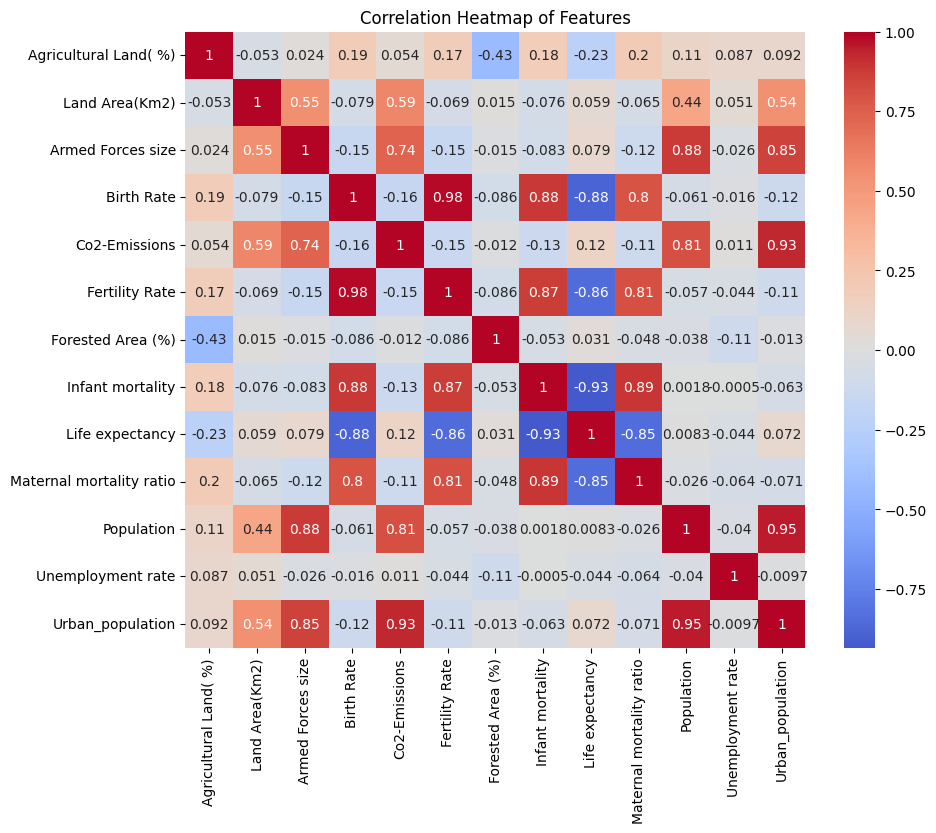

In [29]:
numeric_columns = data_selected.select_dtypes(include=['number'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Features')
plt.show()

In [32]:
fig = px.scatter(
    data_selected,
    x='Country',
    y='Life expectancy',
    text='Life expectancy',
    title='Life Expectancy in Each Country',
    labels={'Life expectancy': 'Life Expectancy (years)'}
)

fig.update_traces(
    marker=dict(size=12, opacity=0.7),
    textfont=dict(size=10),
    textposition='bottom center'
)

fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Life Expectancy',
    hovermode='closest'
)

fig.show()

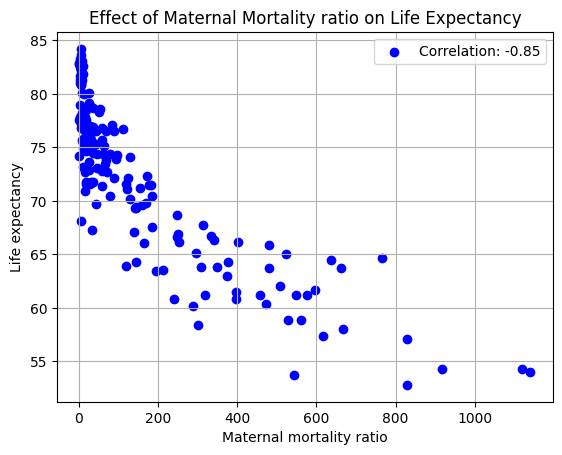

In [36]:
corr_Mmr_Lf = data_selected['Maternal mortality ratio'].corr(data_selected['Life expectancy'])

plt.scatter(data_selected['Maternal mortality ratio'], data_selected['Life expectancy'], color='b', label=f'Correlation: {corr_Mmr_Lf:.2f}')
plt.xlabel('Maternal mortality ratio')
plt.ylabel('Life expectancy')
plt.title('Effect of Maternal Mortality ratio on Life Expectancy')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
data_sorted = data_selected.sort_values(by='Urban_population', ascending=False)

top_countries = data_sorted.head(25)

fig = px.bar(
    top_countries,
    x='Country',
    y='Urban_population',
    text='Population',
    title='Top 25 Countries with Largest Urban Population',
    labels={'Urban_population': 'Urban Population', 'Country': 'Country'}
)

fig.update_traces(
    textposition='outside',
    hoverinfo='x+y+text',
    marker_color='steelblue',
    opacity=0.7
)

fig.update_layout(
    xaxis_title='',
    yaxis_title='Urban Population',
    xaxis_tickangle=-45,
    showlegend=False
)

fig.show()

In [39]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged_data = world.merge(data_selected, left_on='name', right_on='Country')

fig = px.choropleth(merged_data,
                    locations='iso_a3',
                    color='Forested Area (%)',
                    hover_name='name',
                    color_continuous_scale='YlGn',
                    labels={'Forested Area (%)': 'Forested Area Percentage'},
                    title='Forested Area Percentage by Country')

fig.update_geos(showcountries=True, countrycolor='black')
fig.update_layout(geo=dict(showframe=False, showcoastlines=False))
fig.show()

In [40]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged_data = world.merge(data_selected, left_on='name', right_on='Country')

column_to_plot = 'Armed Forces size'
fig = px.choropleth(merged_data,
                    locations='iso_a3',
                    color=column_to_plot,
                    hover_name='name',
                    color_continuous_scale='YlOrRd',
                    labels={column_to_plot: column_to_plot},
                    title=f'{column_to_plot} by Country')

fig.update_geos(showcountries=True, countrycolor='black')
fig.update_layout(geo=dict(showframe=False, showcoastlines=False))
fig.show()

In [42]:
columns_to_plot = ['Armed Forces size', 'Birth Rate', 'Co2-Emissions', 'Infant mortality', 'Unemployment rate']

for column in columns_to_plot:
    top_countries = data_selected.nlargest(20, column)

    fig = px.bar(top_countries, x='Country', y=column, title=f"Top 20 Countries by {column}",
                 labels={'Country': 'Country', column: column})
    fig.update_layout(xaxis={'categoryorder':'total descending'})
    fig.show()